In [26]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [27]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
fashion_mnist=fetch_openml(name='Fashion-MNIST')

c:\Users\omega\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
mnist.target=mnist.target.astype(np.int8)
x=mnist.data/255
y=mnist.target

ValueError: 'green' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

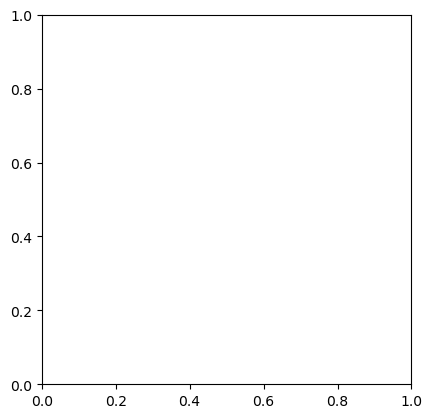

In [29]:
plt.imshow(x[0].reshape(28,28), cmap='green')
plt.title('image:'+str(y[0]))
plt.show()

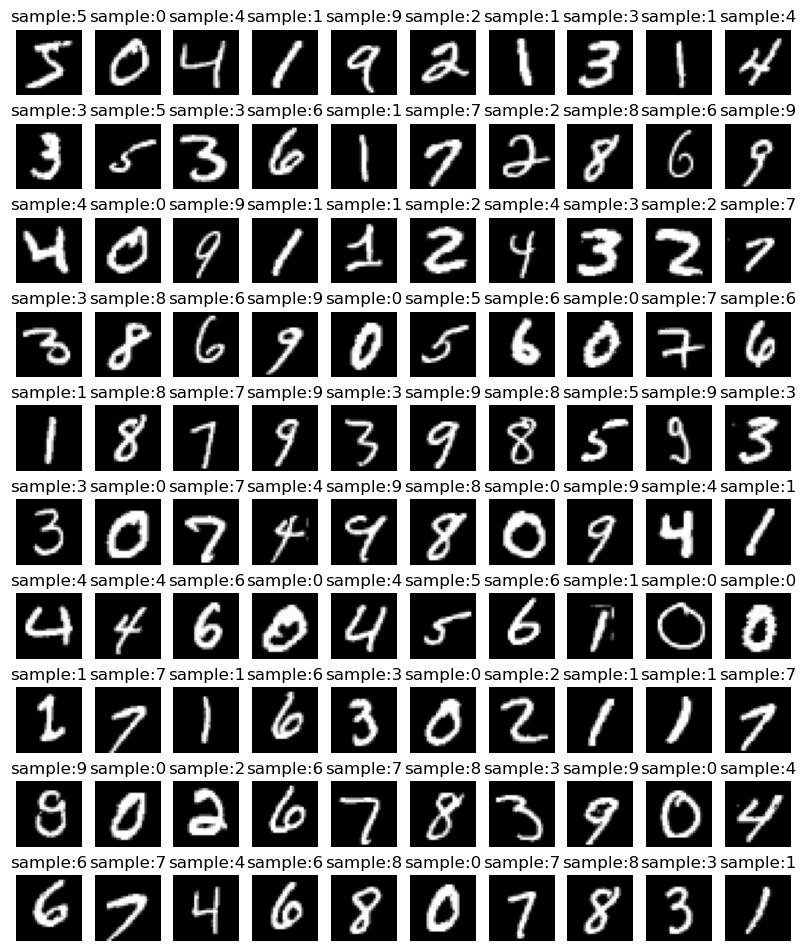

In [ ]:
plt.figure(figsize=(10,12))

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='Pastel1')
    plt.title('sample:%i'%(y[i]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/7, random_state=0)

In [ ]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

In [ ]:
ds_train=TensorDataset(X_train, Y_train)
ds_test=TensorDataset(X_test, Y_test)
load_train=DataLoader(ds_train, batch_size=64, shuffle=True)
load_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [ ]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2',nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3',nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4',nn.Linear(100, 10))

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [ ]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        
        _, y_hat=torch.max(output.data, 1)# 확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()

        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)

In [ ]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct+=predicted.eq(targets.data.view_as(predicted)).sum()

    data_num=len(load_test.dataset) #총데이터 건수
    print('테스트 데이터에서의 예측 정확도 : ', data_num, 100*correct/data_num)
test()

테스트 데이터에서의 예측 정확도 :  10000 tensor(97.3800)


In [25]:
for epoch in range(10):
    train(epoch)
test()

테스트 데이터에서의 예측 정확도 :  10000 tensor(97.5900)


In [ ]:
predicteds=model(X_test)
predicted_list=[]
#print(predicteds)
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    #print(v)
    #print(index)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))